In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd
import pymysql as pm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
try:
    connection = pm.connect(host='localhost',
                             user='root',
                             password='Tashe@1129',
                           database='faostat')

    print("Connection successful to server MySQL")
    
except:
    print("Connection to database failed")

Connection successful to server MySQL


In [4]:
query = '''SELECT y.*,c.*,p.Unit,(p.Total_value*1000) AS Total_value FROM country c
                INNER JOIN population p ON  c.Area_code=p.Area_code
                INNER JOIN years y ON p.Year_code=y.Year_code'''
df_population = pd.read_sql(query,connection)
df_population

,Year_code,Years,Area_code,Area,Unit,Total_value
0,2018,2018,1,Armenia,1000 persons,2.951745e+06
1,2017,2017,1,Armenia,1000 persons,2.944791e+06
2,2016,2016,1,Armenia,1000 persons,2.936143e+06
3,2015,2015,1,Armenia,1000 persons,2.925553e+06
4,2014,2014,1,Armenia,1000 persons,2.912409e+06
...,...,...,...,...,...,...
1180,2018,2018,351,China,1000 persons,1.459378e+09
1181,2017,2017,351,China,1000 persons,1.452625e+09
1182,2016,2016,351,China,1000 persons,1.445524e+09
1183,2015,2015,351,China,1000 persons,1.438193e+09


In [5]:
#Drop China states from population
df_population.drop(df_population[(df_population['Area'].str.contains('china',case=False)) & (df_population['Area']!='China')].index,inplace=True)

In [6]:
df_population = df_population[['Years','Area','Total_value']]

In [7]:
df_population = df_population.groupby("Years").sum().reset_index()
df_population

,Years,Total_value
0,2014,7.295558e+09
1,2015,7.380067e+09
2,2016,7.464295e+09
3,2017,7.548134e+09
4,2018,7.631368e+09


In [8]:
query = '''SELECT y.*,c.*,u.Years_considered,u.Unit,(u.Total_value*1000) AS Total_value FROM country c
                INNER JOIN undernourished u ON  c.Area_code=u.Area_code
                INNER JOIN years y ON u.Year_code=y.Year_code'''
df_undernourished = pd.read_sql(query,connection)
df_undernourished 

,Year_code,Years,Area_code,Area,Years_considered,Unit,Total_value
0,2014,2014,1,Armenia,"""2013,2014,2015""",millions,100.000001
1,2014,2014,2,Afghanistan,"""2013,2014,2015""",millions,8800.000191
2,2014,2014,3,Albania,"""2013,2014,2015""",millions,100.000001
3,2014,2014,4,Algeria,"""2013,2014,2015""",millions,1299.999952
4,2014,2014,7,Angola,"""2013,2014,2015""",millions,6199.999809
...,...,...,...,...,...,...,...
514,2018,2018,236,Venezuela (Bolivarian Republic of),"""2017,2018,2019""",millions,9100.000381
515,2018,2018,237,Viet Nam,"""2017,2018,2019""",millions,6099.999905
516,2018,2018,238,Ethiopia,"""2017,2018,2019""",millions,21500.000000
517,2018,2018,272,Serbia,"""2017,2018,2019""",millions,400.000006


In [9]:
#Drop China states from undernourished for futher purposes
df_undernourished.drop(df_undernourished [(df_undernourished['Area'].str.contains('china',case=False)) & (df_undernourished ['Area']!='China')].index,inplace=True)

In [10]:
df_undernourished = df_undernourished[['Years','Area','Total_value']]
df_undernourished = df_undernourished.groupby("Years").sum().reset_index()
df_undernourished

,Years,Total_value
0,2014,524600.001417
1,2015,525700.005472
2,2016,529599.993959
3,2017,536700.004041
4,2018,545199.999213


Text(0.42499999999999716, 0.5, 'Population')

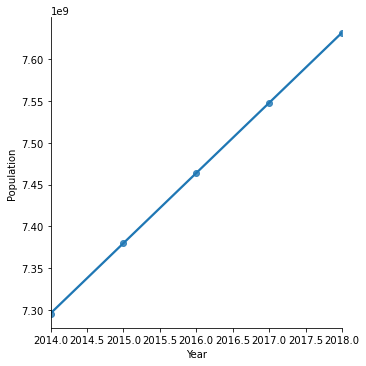

In [11]:
# Plot population
fig = sns.lmplot(data = df_population,x = 'Years',y = 'Total_value')
plt.xlabel('Year')
plt.ylabel('Population')

Text(-15.450000000000003, 0.5, 'Undernourished Population')

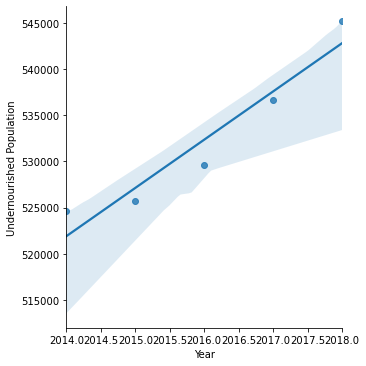

In [12]:
# Plot undernourished
fig = sns.lmplot(data = df_undernourished,x = 'Years',y = 'Total_value')
plt.xlabel('Year')
plt.ylabel('Undernourished Population')

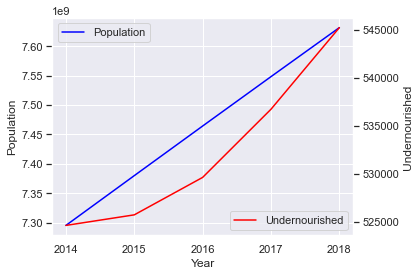

In [40]:
fig, ax1 = plt.subplots()
ax1.plot(df_population['Years'],df_population['Total_value'],color="blue",label = "Population")
ax1.set_xlabel("Year")
ax1.set_ylabel("Population")

ax2 = ax1.twinx()
ax2.plot(df_undernourished['Years'],df_undernourished['Total_value'],color="red",label = "Undernourished")
ax2.set_ylabel("Undernourished")

ax1.legend(loc=0)
ax2.legend(loc=4)

fig.tight_layout()  # othpopulation")
plt.xticks(np.arange(2014,2019,1))
plt.grid()
plt.show()

In [14]:
#Linear regression using sklearn

reg = LinearRegression().fit(df_population[['Years']], df_population['Total_value'])
reg1 = LinearRegression().fit(df_undernourished[['Years']], df_undernourished['Total_value'])

In [15]:
import panel as pn
import panel.widgets as pnw
import ipywidgets as widgets
import panel.widgets as pnw

In [16]:
wid = pnw.TextInput(name='Population projected',value='?')

In [47]:
#Function for population projection                           
def prediction_pop(year):
    res = reg.predict(np.array([[year]]))[0]
#     wid.value = str(round(res,2))
    return round(res,2)

def prediction_und(year):
    res = reg1.predict(np.array([[year]]))[0]
#     wid.value = str(round(res,2))
    return round(res,2)

def prediction_pop_plot(year,title):
    years = np.arange(2013,year+2,1) 
    lst_ = []
    lst = []
    for i in range(2014, year+1):
        lst_.append(i)
        lst.append(prediction_pop(i))
        data = pd.DataFrame({"Year":lst_,"Population":lst})
                            
    sns.set_theme()
    plot = sns.lmplot(data = data, x="Year",y="Population")
    plot.set(xticks=np.arange(2010,2050,5))
    plot.set(yticks=np.arange(7*(10**9),11*(10**9),1*(10**9)))
    plot.set(ylabel = title+" (million)")
    return plot.fig

def prediction_und_plot(year,title):
    years = np.arange(2013,year+2,1) 
    lst_ = []
    lst = []
    for i in range(2014, year+1):
        lst_.append(i)
        lst.append(prediction_und(i))
        data = pd.DataFrame({"Year":lst_,"Population":lst})
                            
    sns.set_theme()
    plot = sns.lmplot(data = data, x="Year",y="Population")
    plot.set(xticks=np.arange(2010,2050,5))
    plot.set(yticks=np.arange(500000,800001,100000))
    plot.set(ylabel = title+" (million)")
    return plot.fig

def create_text_pop(year):
    perc1 = (prediction_pop(year)-prediction_pop(2014))*100/prediction_pop(year)
    avg1 =  [((prediction_pop(x)-prediction_pop(x-1))*100/prediction_pop(x)) for x in range(2014,year)]
    avg1 = sum(avg1)/len(avg1)
    text1 = "<br>\n### The population of {} may increased by {}% comparing to 2014, so average of {}% per year".format(year,
                                                                                                               round(perc1,2),
                                                                                                               round(avg1,2))
    return text1

def create_text_und(year):
    perc2 = (prediction_und(year)-prediction_und(2014))*100/prediction_und(year)
    avg2 =  [((prediction_und(x)-prediction_und(x-1))*100/prediction_und(x)) for x in range(2014,year)]
    avg2 = sum(avg2)/len(avg2)
    text2 = "<br>\n### The undernourished population of {} may increased by {}% comparing to 2014, so average of {}% per year".format(year,
                                                                                                               round(perc2,2),
                                                                                                               round(avg2,2))
    
    return text2

In [18]:
create_text_pop(2040)

'<br>\n### The population of 2040 may increased by 23.03% comparing to 2014, so average of 1.01% per year'

In [19]:
css = '''
.bk.panel-widget-box {
  background: #f0f0f0;
  border-radius: 5px;
  border: 1px black solid;
}
'''

Launching server at http://localhost:63169


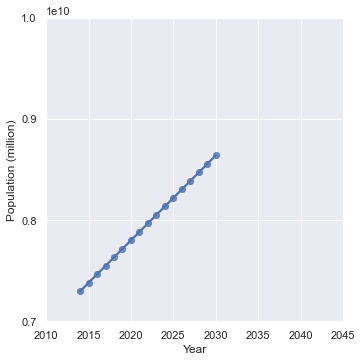

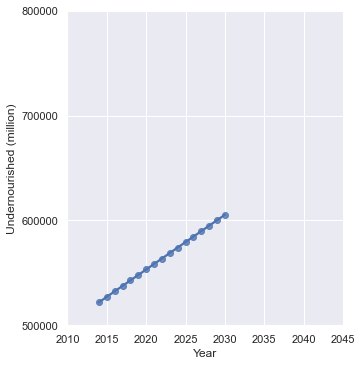

In [48]:
#Create Panel
pn.extension()

#Widgets 
year = pnw.IntSlider(name='Year', value=2030, start=2015, end=2050)

perc = (prediction_pop(year.value)-prediction_pop(2014))*100/prediction_pop(year.value)
avg =  [((prediction_pop(x)-prediction_pop(x-1))*100/prediction_pop(x)) for x in range(2014,year.value)]
avg = sum(avg)/len(avg)

# result.value = str(prediction_pop(year.value))
text = "The population of {} is increased by {}% comparing to 2014, so average of {}% per year".format(year.value,
                                                                                                               round(perc,2),
                                                                                                               round(avg,2))
title = "<br>\n## PROJECTION OF POPULATION "

p = pn.bind(prediction_pop_plot, year,"Population")
p_ = pn.bind(prediction_pop,year)
p1 = pn.bind(prediction_und_plot, year,"Undernourished")
p1_ = pn.bind(prediction_und,year)

res = pn.bind(create_text_pop,year)
res1 = pn.bind(create_text_und,year)

pn.Row(
    pn.Column(title,year,pn.Row("Population: ",p_),pn.Row("Undernourished Population: ",p1_),res,res1),
    p,
    p1,
    css_classes=['panel-widget-box']
).show("Population Analysing")
